Jupyter notebook solution for assignment dealing with microstates, multiplicities, and probabilities for simple systems (coin flipping and Einstein solids)

In [1]:
from pylab import *
# The line above imports both numpy and pyplot
%matplotlib inline
# The line above specifies to display plots within notebook
from scipy.special import factorial
# The factorial function is needed for combinatorial calculations.
# "factorial" was in "scipy.misc". Now it is in "scipy.special".

## Coin Flipping

In [2]:
def probability(Nc):
    ''' Input: number of coins flipped
        Returns: an array with the probabilities of every macrostate
        For a given system, the "macrostate" will be defined by the
        number of heads (Nh) which can have any integer value from
        0 to Nc, so there are Nc+1 different macrostates. '''
    p = zeros(Nc+1) # Array to store the probability of each macrostate
    for Nh in range(0, Nc+1):
        # The multiplicity for each macrostate is "Ω"
        Ω = factorial(Nc, exact=True) \
        / (factorial(Nh, exact=True)*factorial(Nc - Nh, exact=True))
        
        # The total number of microstates is 2**Nc,
        # so probability = multiplicity / 2**Nc
        p[Nh] = Ω / 2**Nc
        
    return p

The cell below tests the `probability` function. Change the value of `Nc` and re-execute the cell to test for different numbers of coins.

Total number of coins: 4
Total probability: 1.0


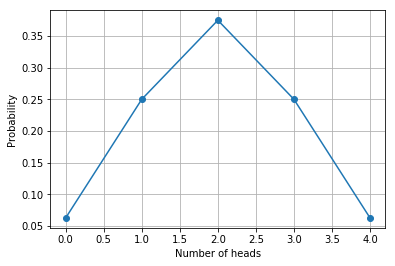

The individual probabilities are:
 [0.0625 0.25   0.375  0.25   0.0625]


In [3]:
Nc = 4
probs = probability(Nc)
print('Total number of coins:', Nc)
print('Total probability:', sum(probs))
plot(probs, 'o-')
xlabel('Number of heads')
ylabel('Probability')
grid(); show()
print('The individual probabilities are:\n', probs)

In the cell below, we create an array, `fH` which contains the *fraction* of coins that are heads, which is the `fH = Nh / Nc` = (number of coins heads / total number of coins).  So `fH = 1` means "all heads" and `fH = 0` means "all tails".

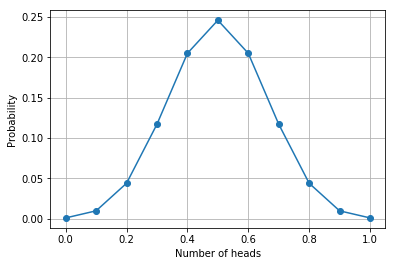

In [4]:
Nc = 10
fH = linspace(0, 1, Nc+1) # Fraction of coins heads

probs = probability(Nc)
plot(fH, probs, 'o-')
xlabel('Number of heads')
ylabel('Probability')
grid(); show()

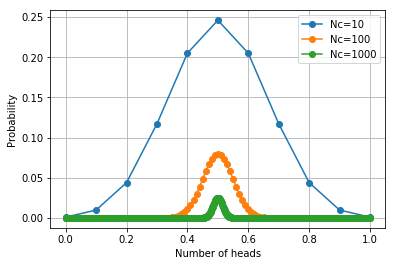

In [5]:
figure() # This allows multiple curves to be added to a single figure

Nc = 10
fH_10 = linspace(0, 1, Nc+1) # Fraction of coins heads
probs_10 = probability(Nc)
plot(fH_10, probs_10, 'o-', label='Nc=10')

Nc = 100
fH_100 = linspace(0, 1, Nc+1) # Fraction of coins heads
probs_100 = probability(Nc)
plot(fH_100, probs_100, 'o-', label='Nc=100')

Nc = 1000
fH_1000 = linspace(0, 1, Nc+1) # Fraction of coins heads
probs_1000 = probability(Nc)
plot(fH_1000, probs_1000, 'o-', label='Nc=1000')

xlabel('Number of heads')
ylabel('Probability')
legend(loc='best')
grid(); show()

The plot above shows that for 10 coins, there is a wide distribution, so there is a significant probabilty ($\approx 5\%$) of having 20% heads or 80% heads.  As the number of coins increases, the width of this distribution decreases.  For 100 coins, it is unlikely for the number of heads to be less than 40% or more than 60%. For 1,000 coins, the only significant probabilities are between 45% and 55%. The computation in the cell below shows that there is only a 0.16% probability of having a fraction of heads that is not between 45% and 55% heads.

The other obvious feature is that the distribution becomes shorter as the number of coins increases.  This is because as `Nc` increases, the number of different macrostates (the number of different possible `Nh` outcomes) also increases.  So in order to stay normalized, such that the total probability is 1, the values of the individual probabilities need to become smaller.

In [6]:
sumProb = 100*sum(probs_1000[450:550])
print('Percent of total probability between 45% and 55%:',sumProb)
print('Leaving:', 100 - sumProb)

Percent of total probability between 45% and 55%: 99.8438861160301
Leaving: 0.15611388396989412


Next, we will compute the width (as the "standard deviation") of each distribution.  See the "statistics" file for background information.

Averages (for 10 coins, 100 coins, 1000 coins):

In [7]:
avg_10 = sum(probs_10 * fH_10)
avg_100 = sum(probs_100 * fH_100)
avg_1000 = sum(probs_1000 * fH_1000)
print('The average values of the fraction heads (fH) are:\n',
      avg_10, avg_100, avg_1000)

The average values of the fraction heads (fH) are:
 0.5 0.5 0.5


The averages of the **SQUARES** (for 10 coins, 100 coins, 1000 coins):

In [8]:
avg2_10 = sum(probs_10 * fH_10**2)
avg2_100 = sum(probs_100 * fH_100**2)
avg2_1000 = sum(probs_1000 * fH_1000**2)
print('The average values of fH**2 are:\n',
      avg2_10, avg2_100, avg2_1000)

The average values of fH**2 are:
 0.2750000000000001 0.25250000000000006 0.25025


Standard deviations:

In [9]:
stdev_10 = sqrt(avg2_10 - avg_10**2)
stdev_100 = sqrt(avg2_100 - avg_100**2)
stdev_1000 = sqrt(avg2_1000 - avg_1000**2)
print('The standard deviations are:\n',
     stdev_10, stdev_100, stdev_1000)

The standard deviations are:
 0.15811388300841922 0.05000000000000058 0.015811388300841025


Note, when going from `Nc = 10` to `Nc = 1000`, the width gets smaller by a factor of 10 when `Nc` gets larger by a factor of 100. So the width is proportional to

$$\frac{1}{\sqrt{N_C}}.$$

Using this result, we can accurately estimate the width of a distribution for very large values of `Nc`.

## Einstein Solids

In [10]:
def solid(q_total, N_A, N_B):
    ''' Computes probabilities for two Einstein solids (A and B)
    with number of oscillators N_A and N_B, sharing q_total
    energy quanta between the two systems.
    
    Returns:
    q_A_array: Array of all possible q_A values (integers from 0 to q_total)
    prob_array: Array of probability for each value of q_A    
    '''
    
    q_A_array  = linspace(0, q_total, q_total+1) # Array of q_A values
    prob_array = zeros(q_total+1) # Array of probability values (for each q_A)
    
    for q_A in q_A_array:
        q_B = q_total - q_A
        omega_A = factorial(q_A + N_A - 1, exact=True) / \
        (factorial(q_A, exact=True) * factorial(N_A - 1, exact=True)) # Multiplicity for A
        omega_B = factorial(q_B + N_B - 1, exact=True) / \
        (factorial(q_B, exact=True) * factorial(N_B - 1, exact=True)) # Multiplicity for B
        omega_AB = omega_A * omega_B # Multiplcity for BOTH A & B
        N = N_A + N_B  # Total number of oscillators in combined system
        # Multiplicity for total system (not differentiating between A,B)
        omega_Total = factorial(q+N-1, exact=True) / (factorial(q, exact=True)*factorial(N-1, exact=True))
        prob_array[int(q_A)] = omega_AB / omega_Total
    return q_A_array, prob_array

The cell below executes the function that is defined in the cell above and plots the results.

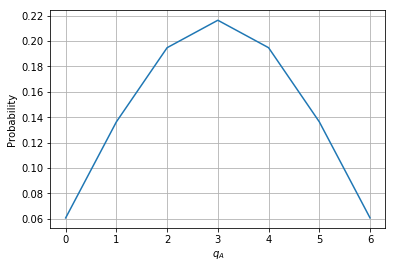

The total probability is: 1.0
Individal probabilities are:
 [0.06060606 0.13636364 0.19480519 0.21645022 0.19480519 0.13636364
 0.06060606]


In [11]:
q = 6
N_A = 3
N_B = 3

q_A, probs = solid(q, N_A, N_B)
plot(q_A, probs)
xlabel('$q_A$')
ylabel('Probability')
grid(True); show()
print('The total probability is:', sum(probs))
print('Individal probabilities are:\n', probs)

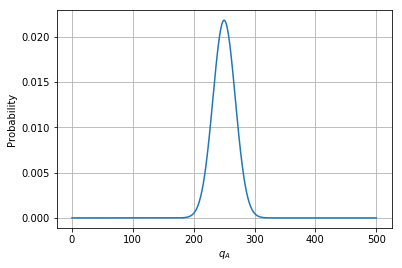

In [12]:
q = 500
N_A = 150
N_B = 150

q_A, probs = solid(q, N_A, N_B)
plot(q_A, probs)
xlabel('$q_A$')
ylabel('Probability')
grid(True); show()

Results:  The probability is **ZERO** for system A to have fewer than 200 energy quanta or more than 300 energy quanta.  The only significant probability is for system A to have $250 \pm 50$ energy quanta. So if we were to start with one of the systems having a higher energy density than the other system, energy will flow to equalize the energy densities because it there is a vanishingly small probablity of the two systems having unequal energy densities once they are put into thermal contact.